In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing the dataset
rowData = pd.read_csv("bodyPerformance.csv")

In [3]:
rowData.head(5)

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


## Information about the columns
* **age:**
* **gender:**
* **height_cm:**
* **weight_kg:**
* **body fat_%:** rate of the fat
* **diastolic:** diastolic blood pressure
* **systolic:** systolic blodd pressure
* **gripFore:**
* **sit and bend forward_cm:**
* **sit-ups counts:**
* **broad jump_cm:**
* **class:** A,B,C,D(A: best)

## Controlling Missing Data

In [4]:
rowData.isnull().sum()

age                        0
gender                     0
height_cm                  0
weight_kg                  0
body fat_%                 0
diastolic                  0
systolic                   0
gripForce                  0
sit and bend forward_cm    0
sit-ups counts             0
broad jump_cm              0
class                      0
dtype: int64

* **There is not any missing data in dataset**

## Exemaining Data Type

In [5]:
rowData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


* **"gender" and "class" are categorical, other of them are numerical.**

## Describing The Dataset

In [6]:
rowData.describe().T

,count,mean,std,min,25%,50%,75%,max
age,13393.0,36.775106,13.625639,21.0,25.0,32.0,48.0,64.0
height_cm,13393.0,168.559807,8.426583,125.0,162.4,169.2,174.8,193.8
weight_kg,13393.0,67.447316,11.949666,26.3,58.2,67.4,75.3,138.1
body fat_%,13393.0,23.240165,7.256844,3.0,18.0,22.8,28.0,78.4
diastolic,13393.0,78.796842,10.742033,0.0,71.0,79.0,86.0,156.2
systolic,13393.0,130.234817,14.713954,0.0,120.0,130.0,141.0,201.0
gripForce,13393.0,36.963877,10.624864,0.0,27.5,37.9,45.2,70.5
sit and bend forward_cm,13393.0,15.209268,8.456677,-25.0,10.9,16.2,20.7,213.0
sit-ups counts,13393.0,39.771224,14.276698,0.0,30.0,41.0,50.0,80.0
broad jump_cm,13393.0,190.129627,39.868000,0.0,162.0,193.0,221.0,303.0


## Data Visualization
### Histogram

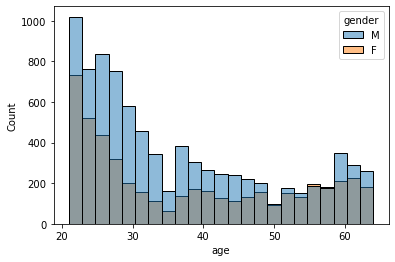

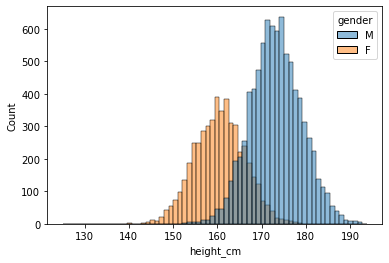

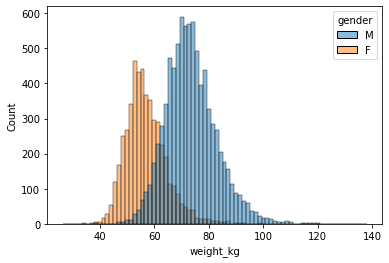

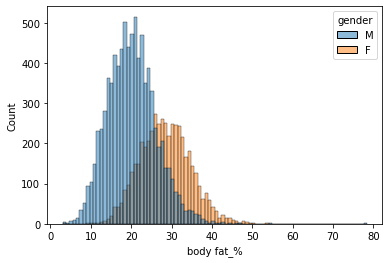

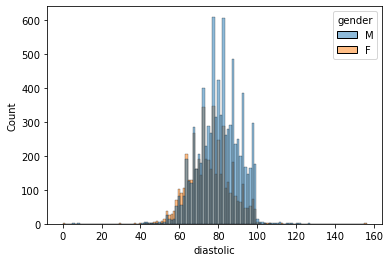

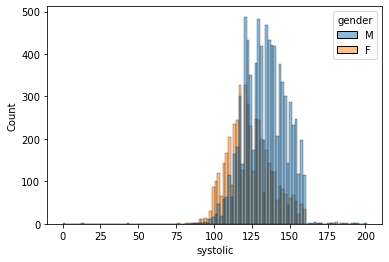

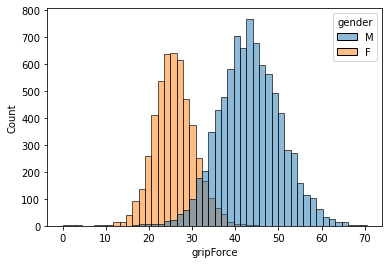

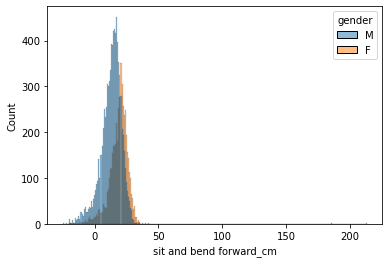

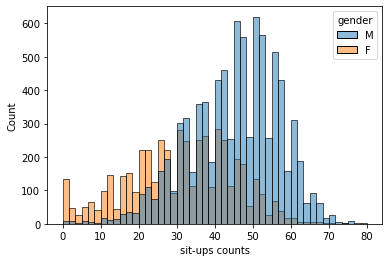

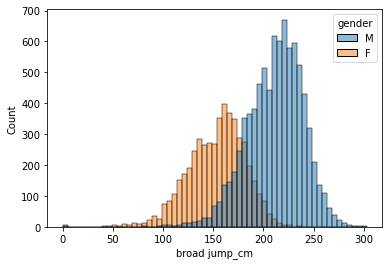

In [7]:
columns = rowData.describe().columns
for i in columns:
    sns.histplot(
        x = i,
        hue = "gender",
        data = rowData
    )
    plt.show()

### Relplot

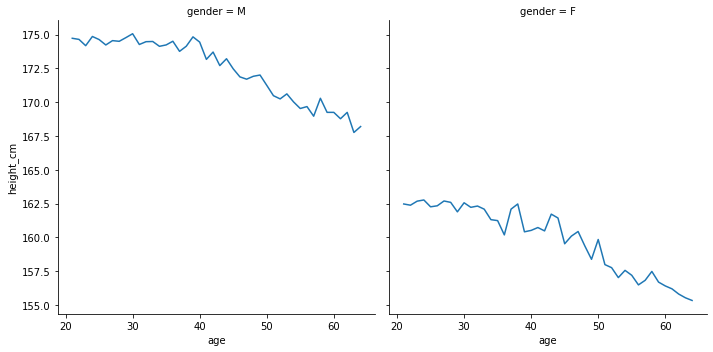

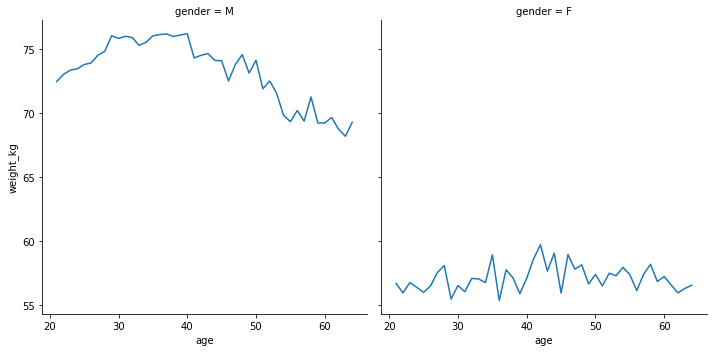

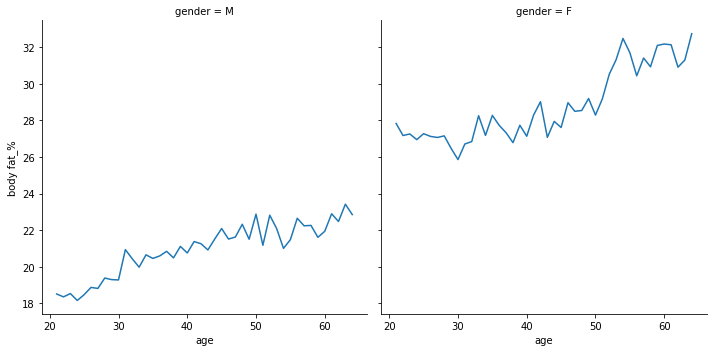

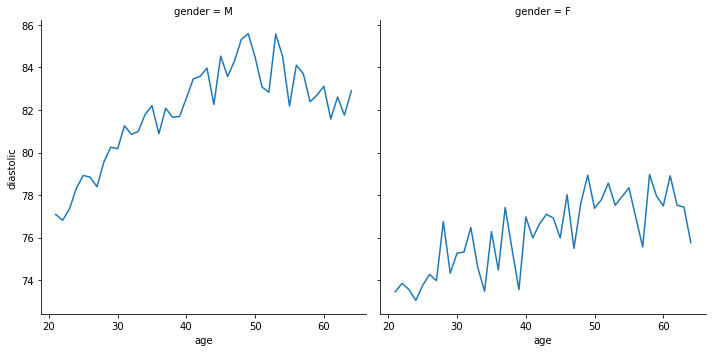

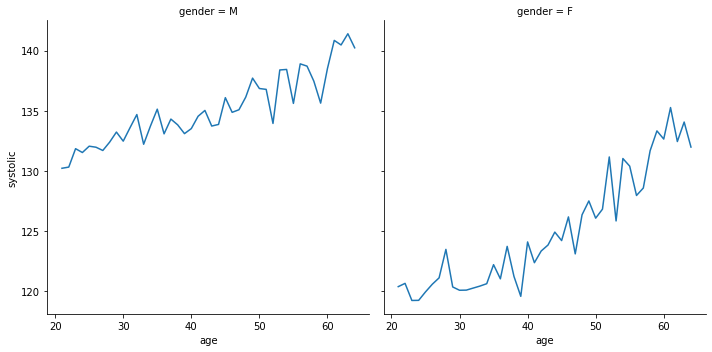

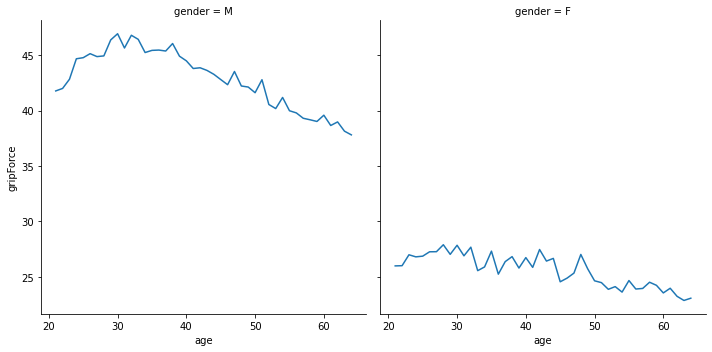

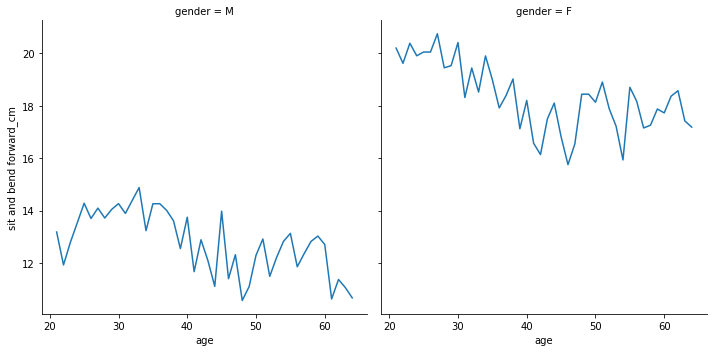

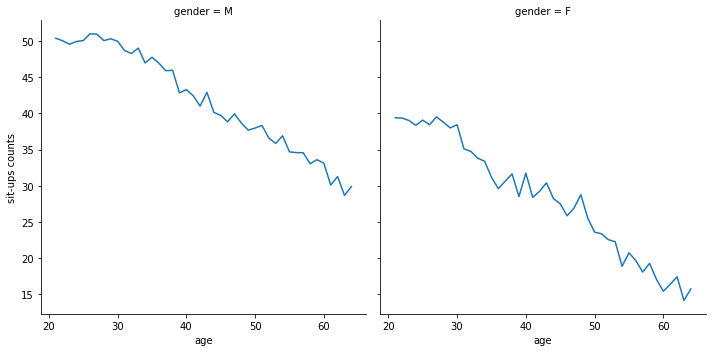

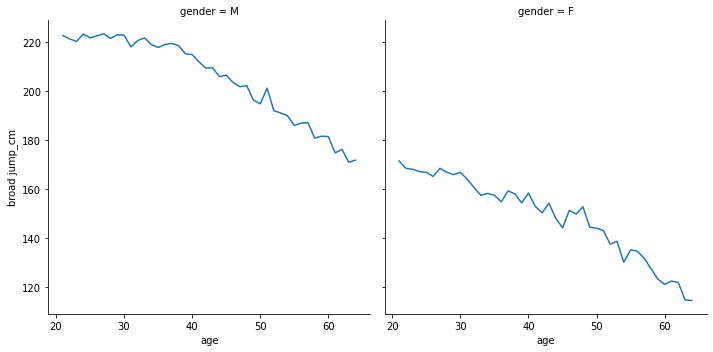

In [8]:
def relPlot(x,y):
    sns.relplot(
        x = x,
        y = y,
        data = rowData,
        col = "gender",
        kind = "line",
        ci = None,
        height = 5
    )
    plt.show()
    
for i in columns[1:]:
    relPlot("age",i)

### Basic Inferences
* While the age is rising, the height is reducing.
* While they are getting older, body fat rate is rising for both gender too.
* Diastolic and Systolic are directly proportional with age.
* The force rises in middle age but after then it reduces.
* According to the graph, the women are more flexible.
* Sit-Ups count rises 25-30 years old but the it reduces.
* While the age is rising, the broad jump reduces for both gender too.

### Box-Plot

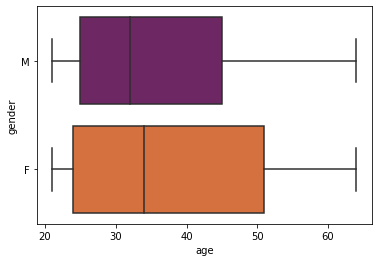

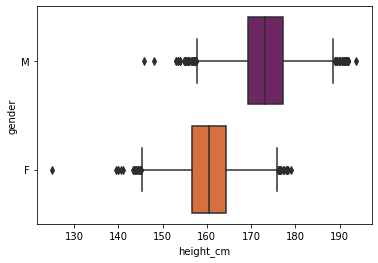

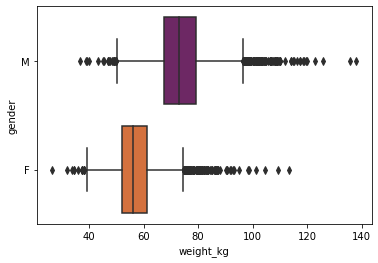

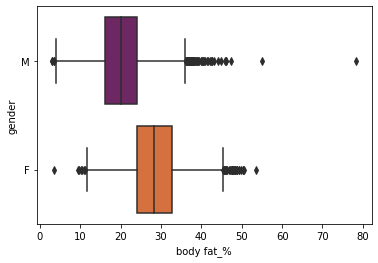

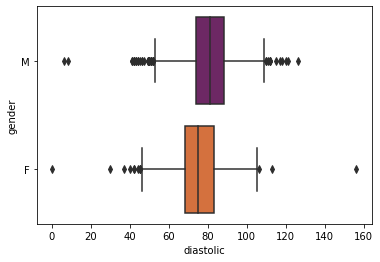

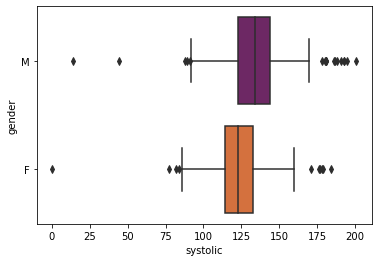

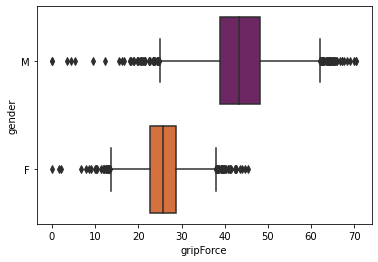

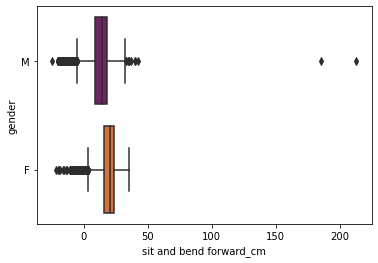

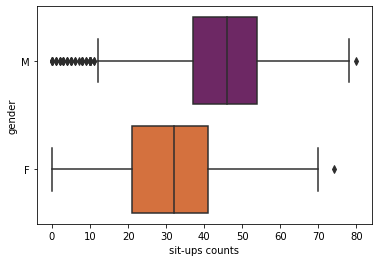

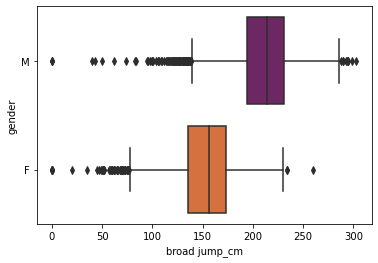

In [9]:
for i in columns:
    sns.boxplot(
        x = i,
        y = "gender",
        data = rowData,
        palette = "inferno"
    )
    plt.show()

## Feature Engineering
### Body Mass Index

In [10]:
indexData = rowData.copy()
indexData["BMIndex"] = indexData["weight_kg"] / (indexData["height_cm"]/100)**2
indexData["situation"] = None
indexData.loc[indexData["BMIndex"] < 18.5 , "situation"] = "underweight"
indexData.loc[(indexData["BMIndex"] >= 18.5)&(indexData["BMIndex"] < 25) , "situation"] = "normal"
indexData.loc[(indexData["BMIndex"] >= 25)&(indexData["BMIndex"] < 30) , "situation"] = "owerweight"
indexData.loc[(indexData["BMIndex"] >= 30)&(indexData["BMIndex"] < 35) , "situation"] = "obese"
indexData.loc[indexData["BMIndex"] >=35 , "situation"] = "extremely-obese"
indexData.head(15)

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,BMIndex,situation
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C,25.344179,owerweight
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A,20.495868,normal
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C,24.181428,normal
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B,23.349562,normal
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B,22.412439,normal
5,36.0,F,165.4,55.40,22.0,64.0,119.0,23.8,21.0,27.0,153.0,B,20.250640,normal
6,42.0,F,164.5,63.70,32.2,72.0,135.0,22.7,0.8,18.0,146.0,D,23.540063,normal
7,33.0,M,174.9,77.20,36.9,84.0,137.0,45.9,12.3,42.0,234.0,B,25.236997,owerweight
8,54.0,M,166.8,67.50,27.6,85.0,165.0,40.4,18.6,34.0,148.0,C,24.261167,normal
9,28.0,M,185.0,84.60,14.4,81.0,156.0,57.9,12.1,55.0,213.0,B,24.718773,normal


In [11]:
indexData["situation"].value_counts()

normal             9241
owerweight         3471
underweight         338
obese               309
extremely-obese      34
Name: situation, dtype: int64

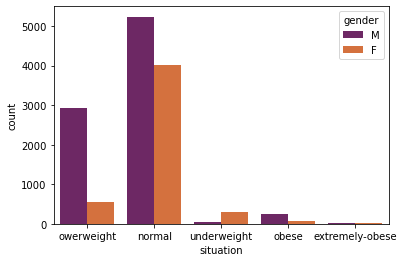

In [12]:
#body mass index visualization
sns.countplot(
    x = indexData["situation"],
    hue = indexData["gender"],
    palette = "inferno"
)
plt.show()

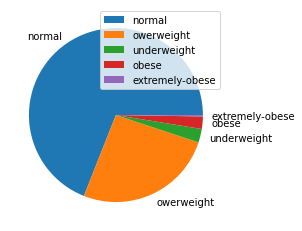

In [13]:
plt.pie(
    indexData["situation"].value_counts().values,
    labels = indexData["situation"].value_counts().index
)
plt.legend()
plt.show()

In [14]:
# According to class, Body Mass Index
indexData.groupby("class")["situation"].value_counts().unstack()

situation,extremely-obese,normal,obese,owerweight,underweight
class,,,,,
A,NaN,2673.0,8.0,569.0,98.0
B,NaN,2432.0,26.0,800.0,89.0
C,NaN,2584.0,9.0,672.0,84.0
D,34.0,1552.0,266.0,1430.0,67.0


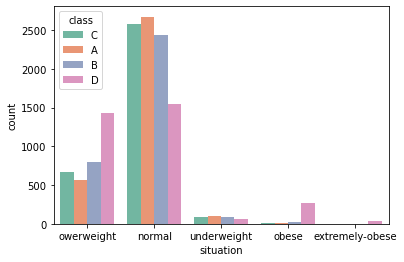

In [15]:
sns.countplot(
    x = indexData["situation"],
    hue = indexData["class"],
    palette = "Set2"
)
plt.show()

## Evaluation of Diastolic and Systolic

In [16]:
#For Systolic
indexData["_systolic"] = None
indexData.loc[(indexData["systolic"] >= 120) & (indexData["systolic"] <= 130) , "_systolic"] = "normal"
indexData.loc[(indexData["systolic"] < 120) , "_systolic"] = "low"
indexData.loc[(indexData["systolic"] > 130) , "_systolic"] = "high"

In [17]:
#For Diastolic
indexData["_diastolic"] = None
indexData.loc[(indexData["diastolic"] >= 70) & (indexData["diastolic"] <= 90) , "_diastolic"] = "normal"
indexData.loc[(indexData["diastolic"] < 70) , "_diastolic"] = "low"
indexData.loc[(indexData["diastolic"] > 90) , "_diastolic"] = "high"

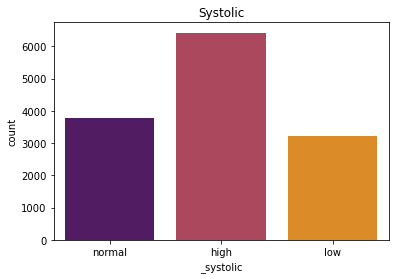

In [18]:
plt.title("Systolic")
sns.countplot(x=indexData["_systolic"],palette="inferno")
plt.show()

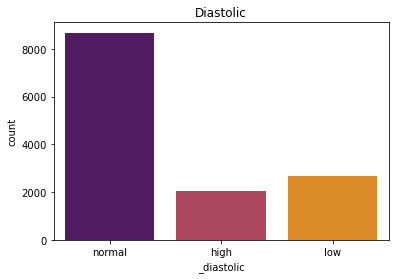

In [19]:
plt.title("Diastolic")
sns.countplot(x=indexData["_diastolic"],palette="inferno")
plt.show()

In [20]:
#blood pressure plot
def bpPlot(x,y,hue,title):
    print("\n"+" "*10 + title)
    sns.relplot(
        x = x,
        y = y,
        row = "gender",
        hue = hue,
        alpha = 0.5,
        data = indexData,
        palette = "inferno",
        kind = "line",
        ci = None
    )
    plt.show()


          Relationship between Systolic and Body Fat


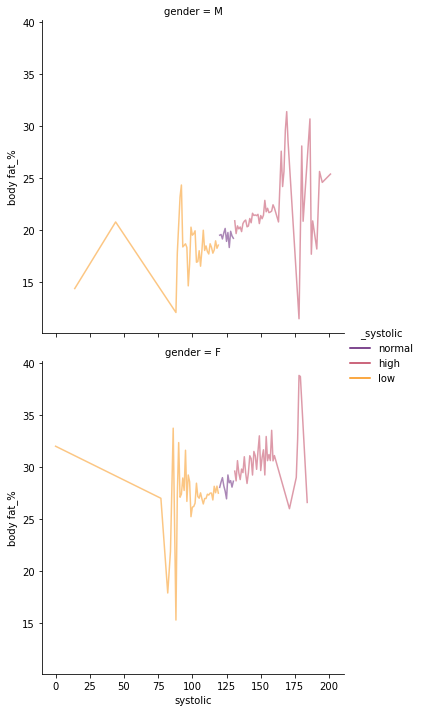


          Relationship between Systolic and Age


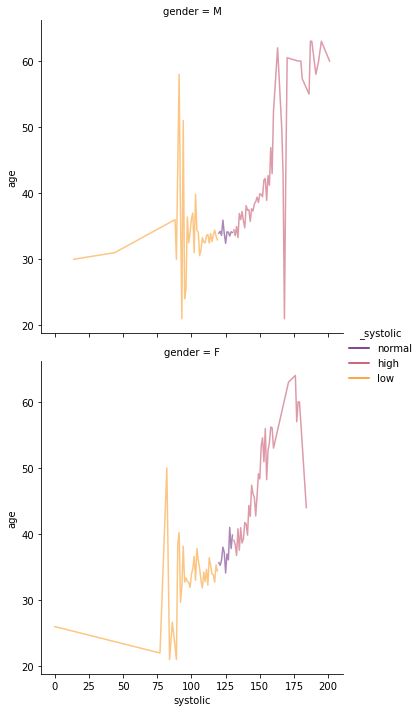

In [21]:
#for systolic
bpPlot("systolic","body fat_%","_systolic","Relationship between Systolic and Body Fat")
bpPlot("systolic","age","_systolic","Relationship between Systolic and Age")


          Relationship between Diastolic and Body Fat


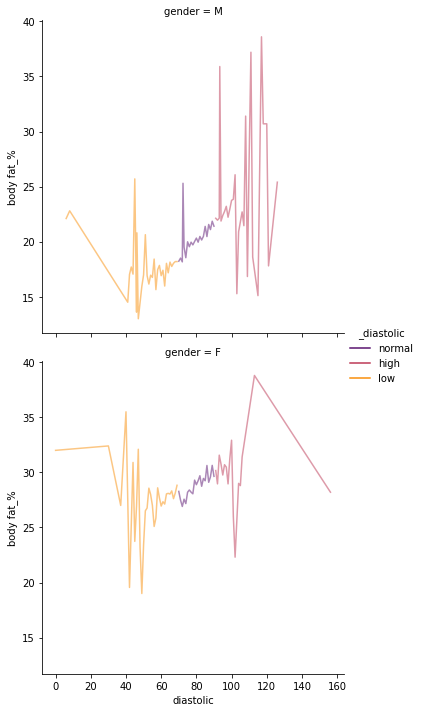


          Relationship between Diastolic and Age


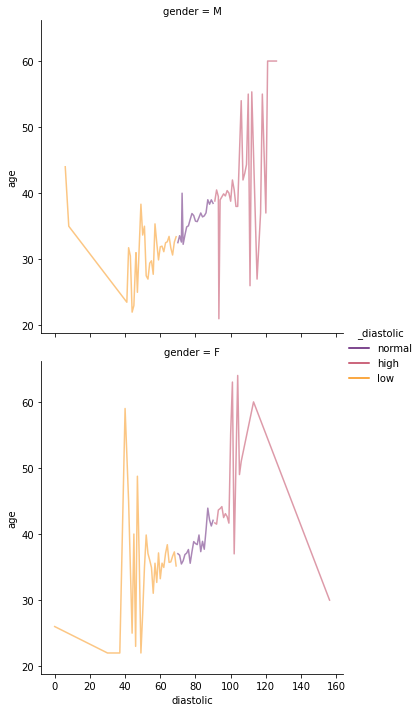

In [22]:
#for diastolic
bpPlot("diastolic","body fat_%","_diastolic","Relationship between Diastolic and Body Fat")
bpPlot("diastolic","age","_diastolic","Relationship between Diastolic and Age")

## Body Mass Index and Blood Pressure Visualization

In [23]:
def BMI_BP(title,x,hue):
    plt.title(title)
    sns.countplot(x=indexData[x] , hue=indexData[hue] , palette = "Set2")
    plt.show()

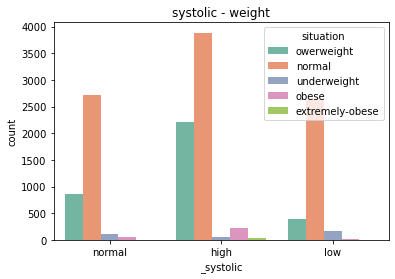

In [24]:
#systolic - weight
BMI_BP("systolic - weight" , "_systolic" , "situation")

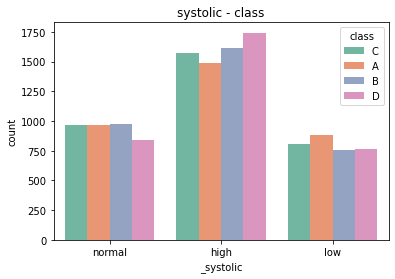

In [25]:
#systolic - class
BMI_BP("systolic - class" , "_systolic" , "class")

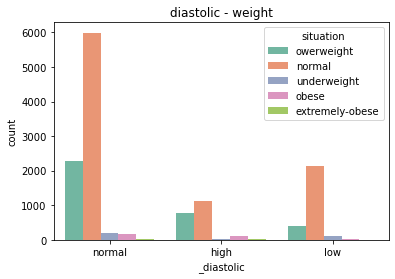

In [26]:
#diastolic - weight
BMI_BP("diastolic - weight" , "_diastolic" , "situation")

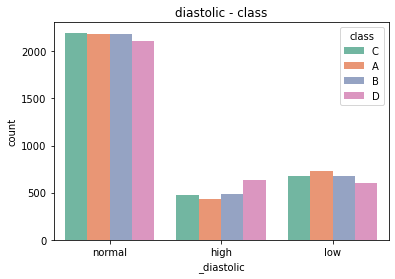

In [27]:
#diastolic - class
BMI_BP("diastolic - class" , "_diastolic" , "class")

## Corr

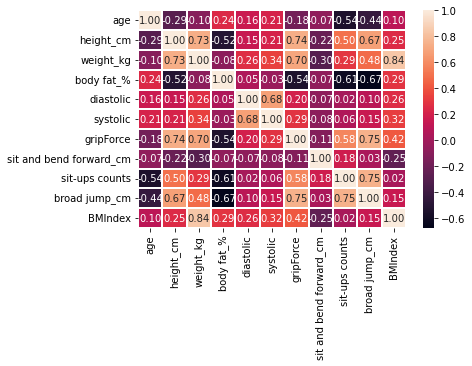

In [28]:
sns.heatmap(indexData.corr() , annot=True , linewidths=0.2 , fmt=".2f")
plt.show()